In [17]:
import os
import shutil
import numpy as np
import cv2
import matplotlib.pyplot as plt
cv2.data.haarcascades

'/home/chumardo/.local/lib/python3.10/site-packages/cv2/data/'

In [18]:
face_cascade_name = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
eye_cascade_name = cv2.data.haarcascades + 'haarcascade_eye.xml'
face_cascade = cv2.CascadeClassifier()
eye_cascade = cv2.CascadeClassifier()
if not face_cascade.load(cv2.samples.findFile(face_cascade_name)):
    print("Error loading xml file")
    exit(0)

if not eye_cascade.load(cv2.samples.findFile(eye_cascade_name)):
    print("Error loading xml file")
    exit(0)

In [19]:
img = cv2.imread('test_image/haaland1.jpg')
img.shape

(1200, 1200, 3)

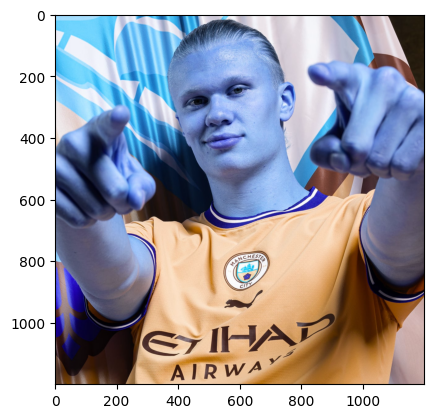

In [20]:
plt.imshow(img)

In [21]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1200, 1200)

In [22]:
gray

array([[224, 224, 224, ...,  18,  18,  18],
       [224, 224, 224, ...,  18,  18,  18],
       [223, 223, 224, ...,  18,  18,  18],
       ...,
       [ 63,  63,  63, ..., 163, 165, 166],
       [ 63,  63,  63, ..., 164, 165, 166],
       [ 63,  63,  62, ..., 165, 166, 167]], dtype=uint8)

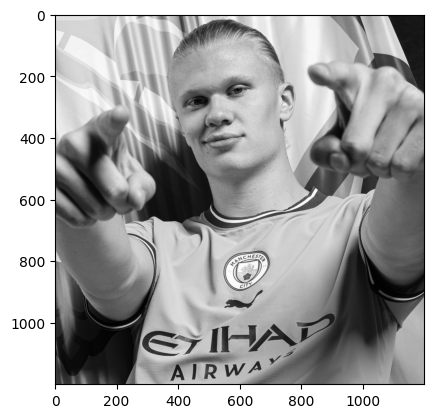

In [23]:
plt.imshow(gray, cmap='gray')

In [24]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[338, 112, 387, 387]], dtype=int32)

In [25]:
(x,y,w,h) = faces[0]
x,y,w,h

(338, 112, 387, 387)

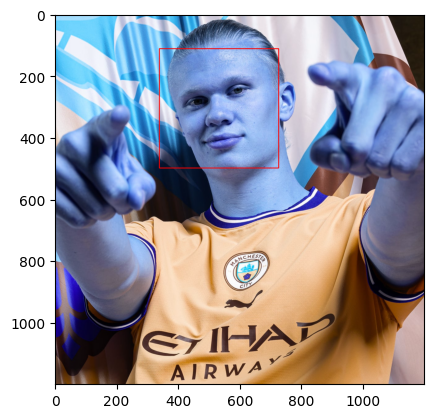

In [26]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

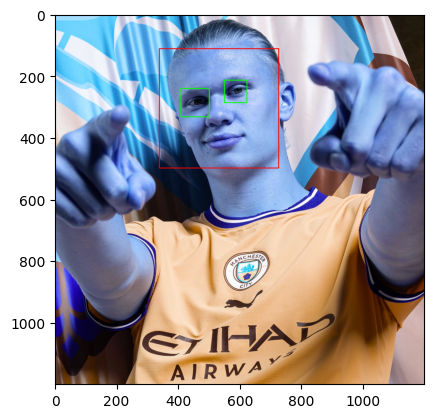

In [31]:
for (x, y, w, h) in faces:
    face_image = cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()
